# Customer Churn Factors

# Goals:
* identify factors that contribute to customer churn
* use machine learning model to classify customers as churn or not

# Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

from scipy import stats
import acquire
import prepare

# Acquire

* Accquired data from noether sequal server
* data obtained 1/2/2023
* 7043 rows by 24 columns before cleaning
* Each row represents a customer
* Each column represents a demograhic or service type information


# Prepare
* Removed columns that did not contain useful information
* Checked for nulls in the data and removed them
* Eliminated rows that did have a space as a value in their total_charges column
* Changed total_charges column object to float
* Added dummy variables for categorical variables
* Split data into train, validate and test (approx. 60/25/15), stratifying on 'churn'
* Scaled continuous variable
* Outliers have not been removed for this iteration of the project


# Data Dictionary




| Feature | Definition |
|:--------|:-----------|
|online_security| True or False, states whether or not customer has online_security|
|churn (target)| True or False, if True, this means that the customer cancelled their services|
|monthly_charges| How much money in USD a customer pays per month|
|total_charges| How much money in USD a customer has paid over the course of their contract(s)|
|contract_type| The length of a customer's contract before they can cancel without penalties|

## A Brief look at data

In [2]:
telco = acquire.get_telco_data()
telco = prepare.prep_classification_project_chi(telco) 
telco.head()

,online_security,churn,internet_service_type,scaled_total,scaled_monthly,online_security_No internet service,online_security_Yes,internet_service_type_Fiber optic,internet_service_type_None,contract_type_One year,contract_type_Two year
0,No,No,DSL,0.068315,0.552421,0,0,0,0,1,0
1,No,No,DSL,0.062454,0.504421,0,0,0,0,0,0
2,No,Yes,Fiber optic,0.032338,0.622316,0,0,1,0,0,0
3,No,Yes,Fiber optic,0.142531,0.825263,0,0,1,0,0,0
4,No,Yes,Fiber optic,0.030789,0.706526,0,0,1,0,0,0


In [3]:
train, test = train_test_split(telco, test_size=.2, random_state=123, stratify=telco.churn)
train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.churn)


# Explore

## How often does customer churn occur?

Text(0.5, 1.0, 'churn rate')

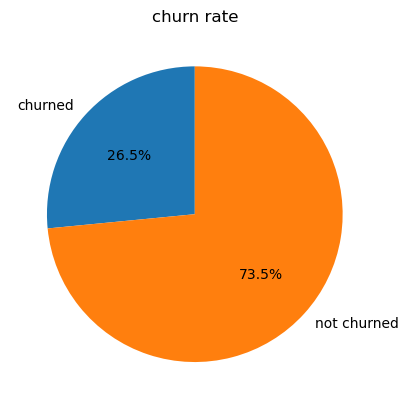

In [5]:
y = np.array([1869, 5174])
mylabels = ['churned', 'not churned']
plt.pie(y, labels = mylabels, startangle=90, autopct='%1.1f%%')
plt.title('churn rate')

* about 1/4 of customers churn

## Does Internet Service Type affect Churn?

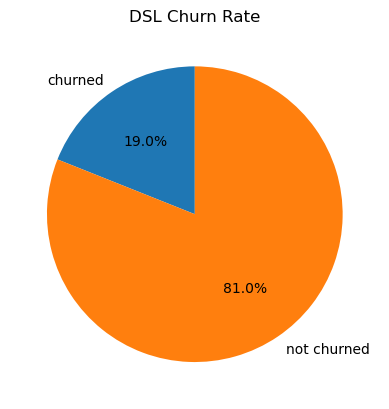

In [6]:
DSL = np.array([459, 1962])
Fiber_optic = np.array([1297, 1799])
nointernet = np.array([113, 1413])
plt.pie(DSL, labels = mylabels, startangle=90, autopct='%1.1f%%')
plt.title('DSL Churn Rate')
plt.show()

* roughly 19% of DSL users churned

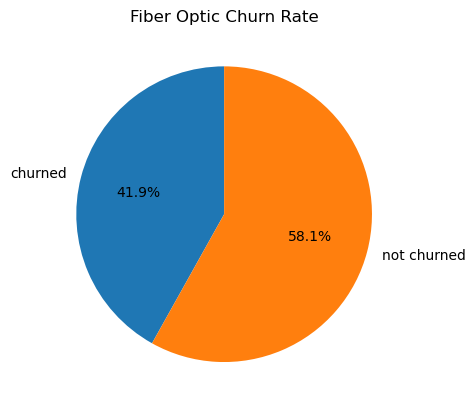

In [7]:
plt.pie(Fiber_optic, labels = mylabels, startangle=90, autopct='%1.1f%%')
plt.title('Fiber Optic Churn Rate')



plt.show()

* roughly 42% of users churned

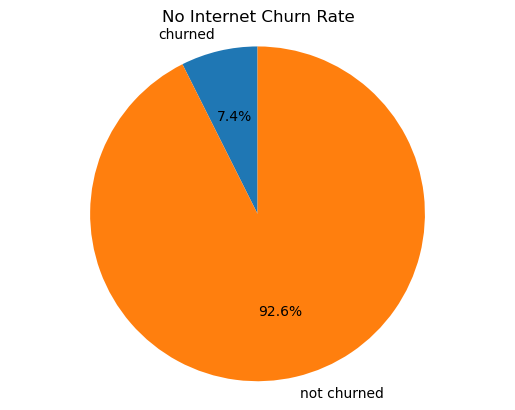

In [8]:
plt.pie(nointernet,labels=mylabels, startangle=90, autopct='%1.1f%%')
plt.title("No Internet Churn Rate")
plt.axis('equal')
plt.show()

* 7.4% of customers without internet churned

##### I will now use a chi squared analysis to investigate whether churn and internet service type are related

* confidence interval of 95%
* and alpha value of 0.05

### Ho: there is no relationship between churn and internet service type
### Ha: there is a relationship between churn and internet service type

In [9]:
observed = pd.crosstab(train.internet_service_type, train.churn)
chi2, p, degf, expected = stats.chi2_contingency(observed)
print(p)

3.2062272759526154e-96


The p-value is less than  alpha. Therefore, we have evidence to support that "churn" and "internet service type" are related. Based on this, and the obvious visual representation of the data, I believe that using the "internet service type" feature in modeling will likely have a small positive impact on the model's accuracy.

# Does having online security affect customer churn?

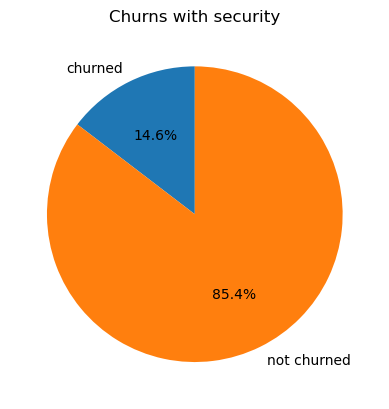

In [10]:
Online = np.array([295, 1724])
nosecure = np.array([1461, 2037])

plt.pie(Online, labels = mylabels, startangle=90, autopct='%1.1f%%')
plt.title('Churns with security')
plt.show()

* about 15% of customers with online security churned

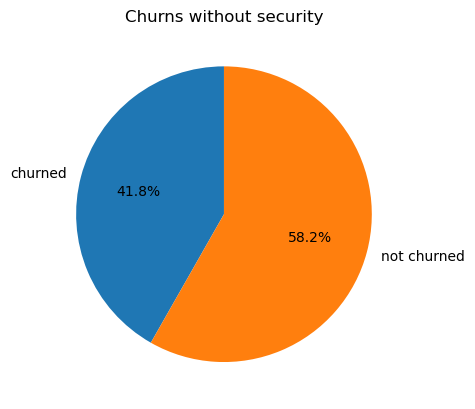

In [11]:
plt.pie(nosecure, labels = mylabels, startangle=90, autopct='%1.1f%%')
plt.title('Churns without security')
plt.show()

* about 42% of churned that didnt have security

##### I will now use a chi squared analysis to investigate whether churn and internet service type are related
* confidence interval of 95%
* and alpha value of 0.05
### Ho: there is no relationship between churn and online security
### Ha: there is a relationship between churn and online security

In [12]:
observed = pd.crosstab(train.online_security, train.churn)
chi2, p, degf, expected = stats.chi2_contingency(observed)
print(p)

1.3862996282206897e-111


The p-value is less than  alpha. Therefore, we have evidence to support that "churn" and "internet service type" are related. Based on this, and the obvious visual representation of the data, I believe that using the "internet service type" feature in modeling will likely have a small positive impact on the model's accuracy.

# Do total charges affect churn?

![](churn_total.png)

* the graph shows that as total charges increase, churn decreases. This may be because the more total charges, the more time the customer has been with the company

# Do monthly charges affect churn?

![](churn_month.png)

* it can be seen in the visualization that customers who are charged around $80 are the most likely to have churned

# Does contract type affect churn?

![](Churn_service_contract.png)

* our visuales indicate that contract type is a factor for churn

# Exploration Summary

* "Internet service type" and "online security" were each found to be factors of "churn"
    * The influence appears strong
* Monthly charges appears to have influence on churn
    * the spread of the distribution indicates that the influence is weak
* Contract type can may influence churn based on visuals
* Having online security also affects churn as shown in our visuals
* These are enough features to create a model that can predict customer churn

# Features I'm modeling with

* total charges
* monthly charges
* internet service type
* contract type
* online security

# Modeling

* I will use accuracy as my evaluation metric
* no churn makeup 73.5% of the data

Modeling
I will use accuracy as my evaluation metric
non-upsets makeup 67% of the data

* by guessing no for every game one could achieve an accuracy of 73.5% 
* 73.5% will be the baseline accuracy I use for this project
* I will be evaluating models developed using four different model types and various hyperparameter configurations * Models will be evaluated on train and validate data
* The model that performs the best will then be evaluated on test data

### Decision tree

In [13]:
seed = 42
clf = DecisionTreeClassifier(max_depth = 3, random_state = 42)
telco = acquire.get_telco_data()
telco = prepare.prep_classification_project_tree(telco)
train, test = train_test_split(telco, test_size=.2, random_state=123, stratify=telco.churn)
train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.churn)
x_train = train.drop(columns = ['churn'])
y_train = train['churn']

x_val = validate.drop(columns = ['churn'])
y_val = validate['churn']

x_test = test.drop(columns = ['churn'])
y_test = test['churn']

# Prepping data for decision tree

In [14]:
clf.fit(x_train, y_train) #fit model

DecisionTreeClassifier(max_depth=3, random_state=42)

In [15]:
y_pred = clf.predict(x_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

          No       0.84      0.89      0.87      2891
         Yes       0.65      0.53      0.58      1046

    accuracy                           0.80      3937
   macro avg       0.74      0.71      0.72      3937
weighted avg       0.79      0.80      0.79      3937



In [16]:
y_pred = clf.predict(x_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

          No       0.83      0.87      0.85      1239
         Yes       0.59      0.50      0.54       449

    accuracy                           0.77      1688
   macro avg       0.71      0.69      0.70      1688
weighted avg       0.76      0.77      0.77      1688



* accuracy of decision tree is 80% for train and for validate is 77%
* small difference between the two indicates a decent model

### Random Forest

In [17]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)
rf.fit(x_train, y_train)
RandomForestClassifier(max_depth=3, min_samples_leaf=3, random_state=123)
y_pred = rf.predict(x_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

          No       0.81      0.95      0.87      2891
         Yes       0.72      0.38      0.50      1046

    accuracy                           0.80      3937
   macro avg       0.77      0.66      0.69      3937
weighted avg       0.79      0.80      0.77      3937



In [18]:
y_pred = rf.predict(x_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

          No       0.80      0.92      0.86      1239
         Yes       0.62      0.35      0.45       449

    accuracy                           0.77      1688
   macro avg       0.71      0.64      0.65      1688
weighted avg       0.75      0.77      0.75      1688



* Random forest accuracy is 80% for train and 77% for validate
* small difference between the two indicates a decent model

### KNN model

In [19]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(x_train, y_train)
y_pred = knn.predict(x_train)
y_pred_proba = knn.predict_proba(x_train)

In [20]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

          No       0.87      0.92      0.89      2891
         Yes       0.74      0.61      0.67      1046

    accuracy                           0.84      3937
   macro avg       0.80      0.77      0.78      3937
weighted avg       0.83      0.84      0.83      3937



In [21]:
y_pred = knn.predict(x_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

          No       0.82      0.86      0.84      1239
         Yes       0.56      0.50      0.53       449

    accuracy                           0.76      1688
   macro avg       0.69      0.68      0.68      1688
weighted avg       0.75      0.76      0.76      1688



* KNN accuracy is better than the base line with 84% accuracy in train. Accuracy for validate 76%
* Due to the large difference in accuracy, the KNN model is overfit

# Logistic Regression

In [22]:
telco = acquire.get_telco_data()
telco = prepare.prep_classification_project_logistic(telco)
train, test = train_test_split(telco, test_size=.2, random_state=123, stratify=telco.churn_Yes)
train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.churn_Yes)
x_train = train.drop(columns = ['churn_Yes'])
y_train = train['churn_Yes']

x_val = validate.drop(columns = ['churn_Yes'])
y_val = validate['churn_Yes']

x_test = test.drop(columns = ['churn_Yes'])
y_test = test['churn_Yes']

In [23]:
logit = LogisticRegression(random_state= 42)
logit.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [24]:
y_pred = logit.predict(x_train)
print(classification_report(y_train, y_pred))
y_pred = logit.predict(x_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      2891
           1       0.63      0.52      0.57      1046

    accuracy                           0.79      3937
   macro avg       0.73      0.70      0.71      3937
weighted avg       0.78      0.79      0.78      3937

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1239
           1       0.58      0.51      0.54       449

    accuracy                           0.77      1688
   macro avg       0.70      0.69      0.69      1688
weighted avg       0.76      0.77      0.76      1688



# Comparing models

* Decision tree, random forest, Logistic Regression, and KNN all had similiar accuracy with KNN being slightly more accurate
* KNN model is overfit
* Decision tree, random forest, and logistic regression had the most similar results
* all models slightly did better than baseline
* I will be using the logistic regression model on my test data set

In [25]:
y_pred = logit.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1033
           1       0.62      0.54      0.58       374

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407



# Modeling Summary

* all models did slightly better than the baseline
* KNN model is overfit
* Decision Tree and random forest are pretty good models but logistic regression is slightly better
* Logistic Regression was used on the test data

# Conclusions

### Explore

* "Internet service type" and "online security" were each found to be factors of "churn"
    * The influence appears strong
* Monthly charges appears to have influence on churn
    * the spread of the distribution indicates that the influence is weak
* Contract type can may influence churn based on visuals
* Having online security also affects churn as shown in our visuals
* These are enough features to create a model that can predict customer churn

### Modeling

* None of the models signifigantly out performed the baseline 
* All models had similar accuracy
* Possible Reasons:
    * hyperparameters were not good predictors of churn


### Reccomendations

* Consider lowering price of Fiber Optic and increase customers with online_security
* Use Logistic Regression model to predict whether or not a customer is going to churn and have marketing team target these customers

### What's next

* Select different hyperparameters and run models again to get a better one
* ask supervisor to purchase tableau so I can make better visuals

In [26]:
telco = acquire.get_telco_data()
telco = prepare.prep_classification_project_pred(telco) 
telco.head()

,customer_id,scaled_total,scaled_monthly,online_security_No internet service,online_security_Yes,churn_Yes,internet_service_type_Fiber optic,internet_service_type_None,contract_type_One year,contract_type_Two year
0,0002-ORFBO,0.068315,0.552421,0,0,0,0,0,1,0
1,0003-MKNFE,0.062454,0.504421,0,0,0,0,0,0,0
2,0004-TLHLJ,0.032338,0.622316,0,0,1,1,0,0,0
3,0011-IGKFF,0.142531,0.825263,0,0,1,1,0,0,0
4,0013-EXCHZ,0.030789,0.706526,0,0,1,1,0,0,0


In [27]:
train, test = train_test_split(telco, test_size=.2, random_state=123, stratify=telco.churn_Yes)
train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.churn_Yes)

In [28]:
x_train = train.drop(columns = ['churn_Yes', 'customer_id'])
y_train = train['churn_Yes']

x_val = validate.drop(columns = ['churn_Yes', 'customer_id'])
y_val = validate['churn_Yes']

x_test = test.drop(columns = ['churn_Yes', 'customer_id'])
y_test = test['churn_Yes']

In [29]:
logit = LogisticRegression(random_state= 42)
logit.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [30]:
test

,customer_id,scaled_total,scaled_monthly,online_security_No internet service,online_security_Yes,churn_Yes,internet_service_type_Fiber optic,internet_service_type_None,contract_type_One year,contract_type_Two year
3311,4716-MRVEN,0.069006,0.168421,1,0,0,0,1,1,0
6330,8966-KZXXA,0.107193,0.211368,1,0,0,0,1,0,1
6156,8720-RQSBJ,0.005066,0.370526,0,0,0,0,0,0,0
5313,7504-UWHNB,0.199124,0.587368,0,0,0,1,0,0,0
1176,1730-VFMWO,0.209020,0.422737,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
600,0877-SDMBN,0.649301,0.875368,0,1,1,1,0,1,0
3946,5555-RNPGT,0.025781,0.208842,1,0,0,0,1,0,0
3230,4628-CTTLA,0.243120,0.330947,0,0,1,0,0,0,0
349,0516-QREYC,0.052960,0.170947,1,0,0,0,1,0,0


In [31]:
y_pred = logit.predict(x_test)


In [32]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [33]:
y_pred_proba = rf.predict_proba(x_test)

In [34]:
y_pred_proba = pd.DataFrame(y_pred_proba)
y_pred_proba
y_pred_proba = y_pred_proba.rename(columns={y_pred_proba.columns[1]: 'churn'})
cadfa = np.array(y_pred_proba['churn'])
adfad = np.array(test.customer_id)

In [44]:
csvdf = pd.DataFrame({'prediction': y_pred,
            'probability': cadfa,
             'customer_id': adfad})

In [48]:
csvdf.pd.to_csv('preandprob', index = False)

AttributeError: 'function' object has no attribute 'pd'

In [45]:
csvdf = csvdf.pivot

In [46]:
csvdf.to_csv('preandprob', index = False)

AttributeError: 'function' object has no attribute 'to_csv'